# 객체지향형 프로그래밍 (Class, __init__, self 등 간략 요약)

In [ ]:
### 객체 지향형 프로그래밍 ###

# Class는 인스턴스와 그 인스턴스에 적용할 함수들을 정리해놓는 어떤 틀 이라고 생각하면 됨
# __init__은 여기서 Class를 호출하면서 인스턴스를 생성하는 역할 이 아래에서 self 때리는건
  # self 를 사용함으로써 할당된 인스턴스 뒤에 .함수를 붙이는 간편한 작업이 가능해짐
  # 특히 __init__ 아래의 self.함수1=함수1, self.함수2=함수2 와 같은 작업들은 이후에 생성된 인스턴스에 그아래 정의될 함수를 바로 쓸 수 있게 하기 위함임

  # Class와 __init__으로 객체(인스턴스)를 생성하고
  # self, 함수와 같은 변수를 지정하고
  # 그아래 def 에서 self를 다시 사용해 생성된 객체들에 연산 및 함수를 원할히 사용하게 함

# 예시
class MyStatus:
    def __init__(self,age,name,height,weight):
        self.age = age
        self.name = name
        self.height = height
        self.weight = weight

    def print_name(self):
        print(self.name)

    def print_age(self):
        print(self.age)

    def print_height(self):
        print(self.height)

    def print_weight(self):
        print(self.weight)

a=MyStatus(34,"yamada",170,78)
b=MyStatus(25,'David',173,88)

a.print_name()
b.print_name()

yamada
David


# library importing, test용 데이터 가져오기




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

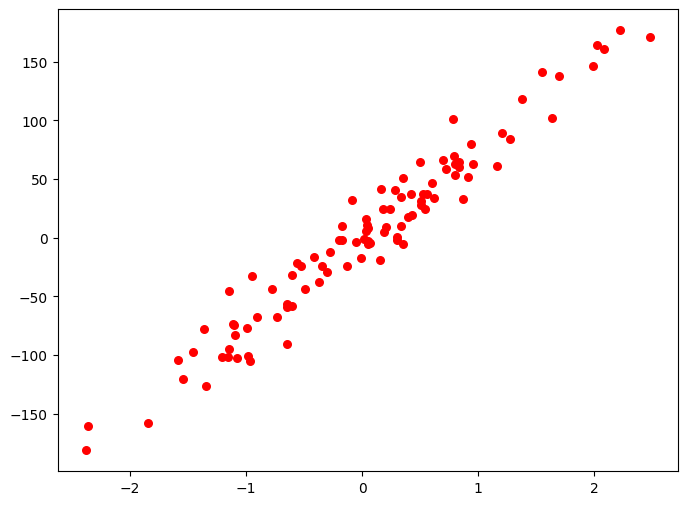

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], y, color='r', marker='o', s=30)
plt.show()

# Linear Regression 코드 구현

In [ ]:
class LinearRegression:

  def __init__(self, learning_rate=0.01, n_iters=5000):
    self.learning_rate = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias

      dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
      db = (1/n_samples) * np.sum(y_pred - y)

      self.weights = self.weights - self.learning_rate * dw
      self.bias = self.bias - self.learning_rate * db

  def predict(self, X):
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred

# 예측 값에 대한 평가지표 확인하기 (mse)

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

In [ ]:
def mse(y_test, predictions):
  return np.mean((y_test - predictions)**2)
def mae(y_test, predictions):
  return np.mean(abs(y_test - predictions))
def mape(y_test, predictions):
  return np.mean(abs((y_test - predictions) / y_test))

mse=mse(y_test, predictions)
mae=mae(y_test, predictions)
mape=mape(y_test, predictions)
print("MSE :",mse)
print("MAE :",mae)
print("MAPE :",mape)

MSE : 305.77413162286337
MAE : 14.465242376642454
MAPE : 1.046842365596504


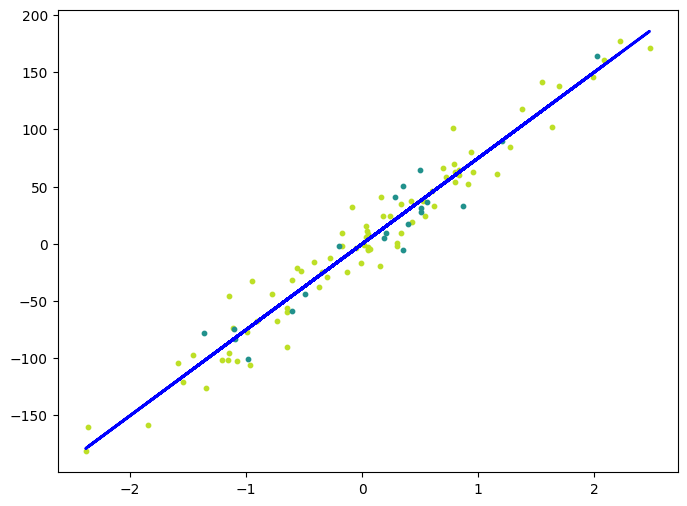

In [ ]:
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1= plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color = 'blue', linewidth=2, label='Predictions')
plt.show()